# 다중선형회귀 - 2차항 생성 방법

## #01. 준비작업

### [1] 패키지 참조

In [28]:
%%time

import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures

CPU times: total: 0 ns
Wall time: 998 µs


### [2] 데이터 가져오기

농어의 크기와 무게 데이터

In [29]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)
my_pretty_table(origin.head())

+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+


## #02. 탐색적 데이터 분석

### [1] 산점도 그래프 시각화

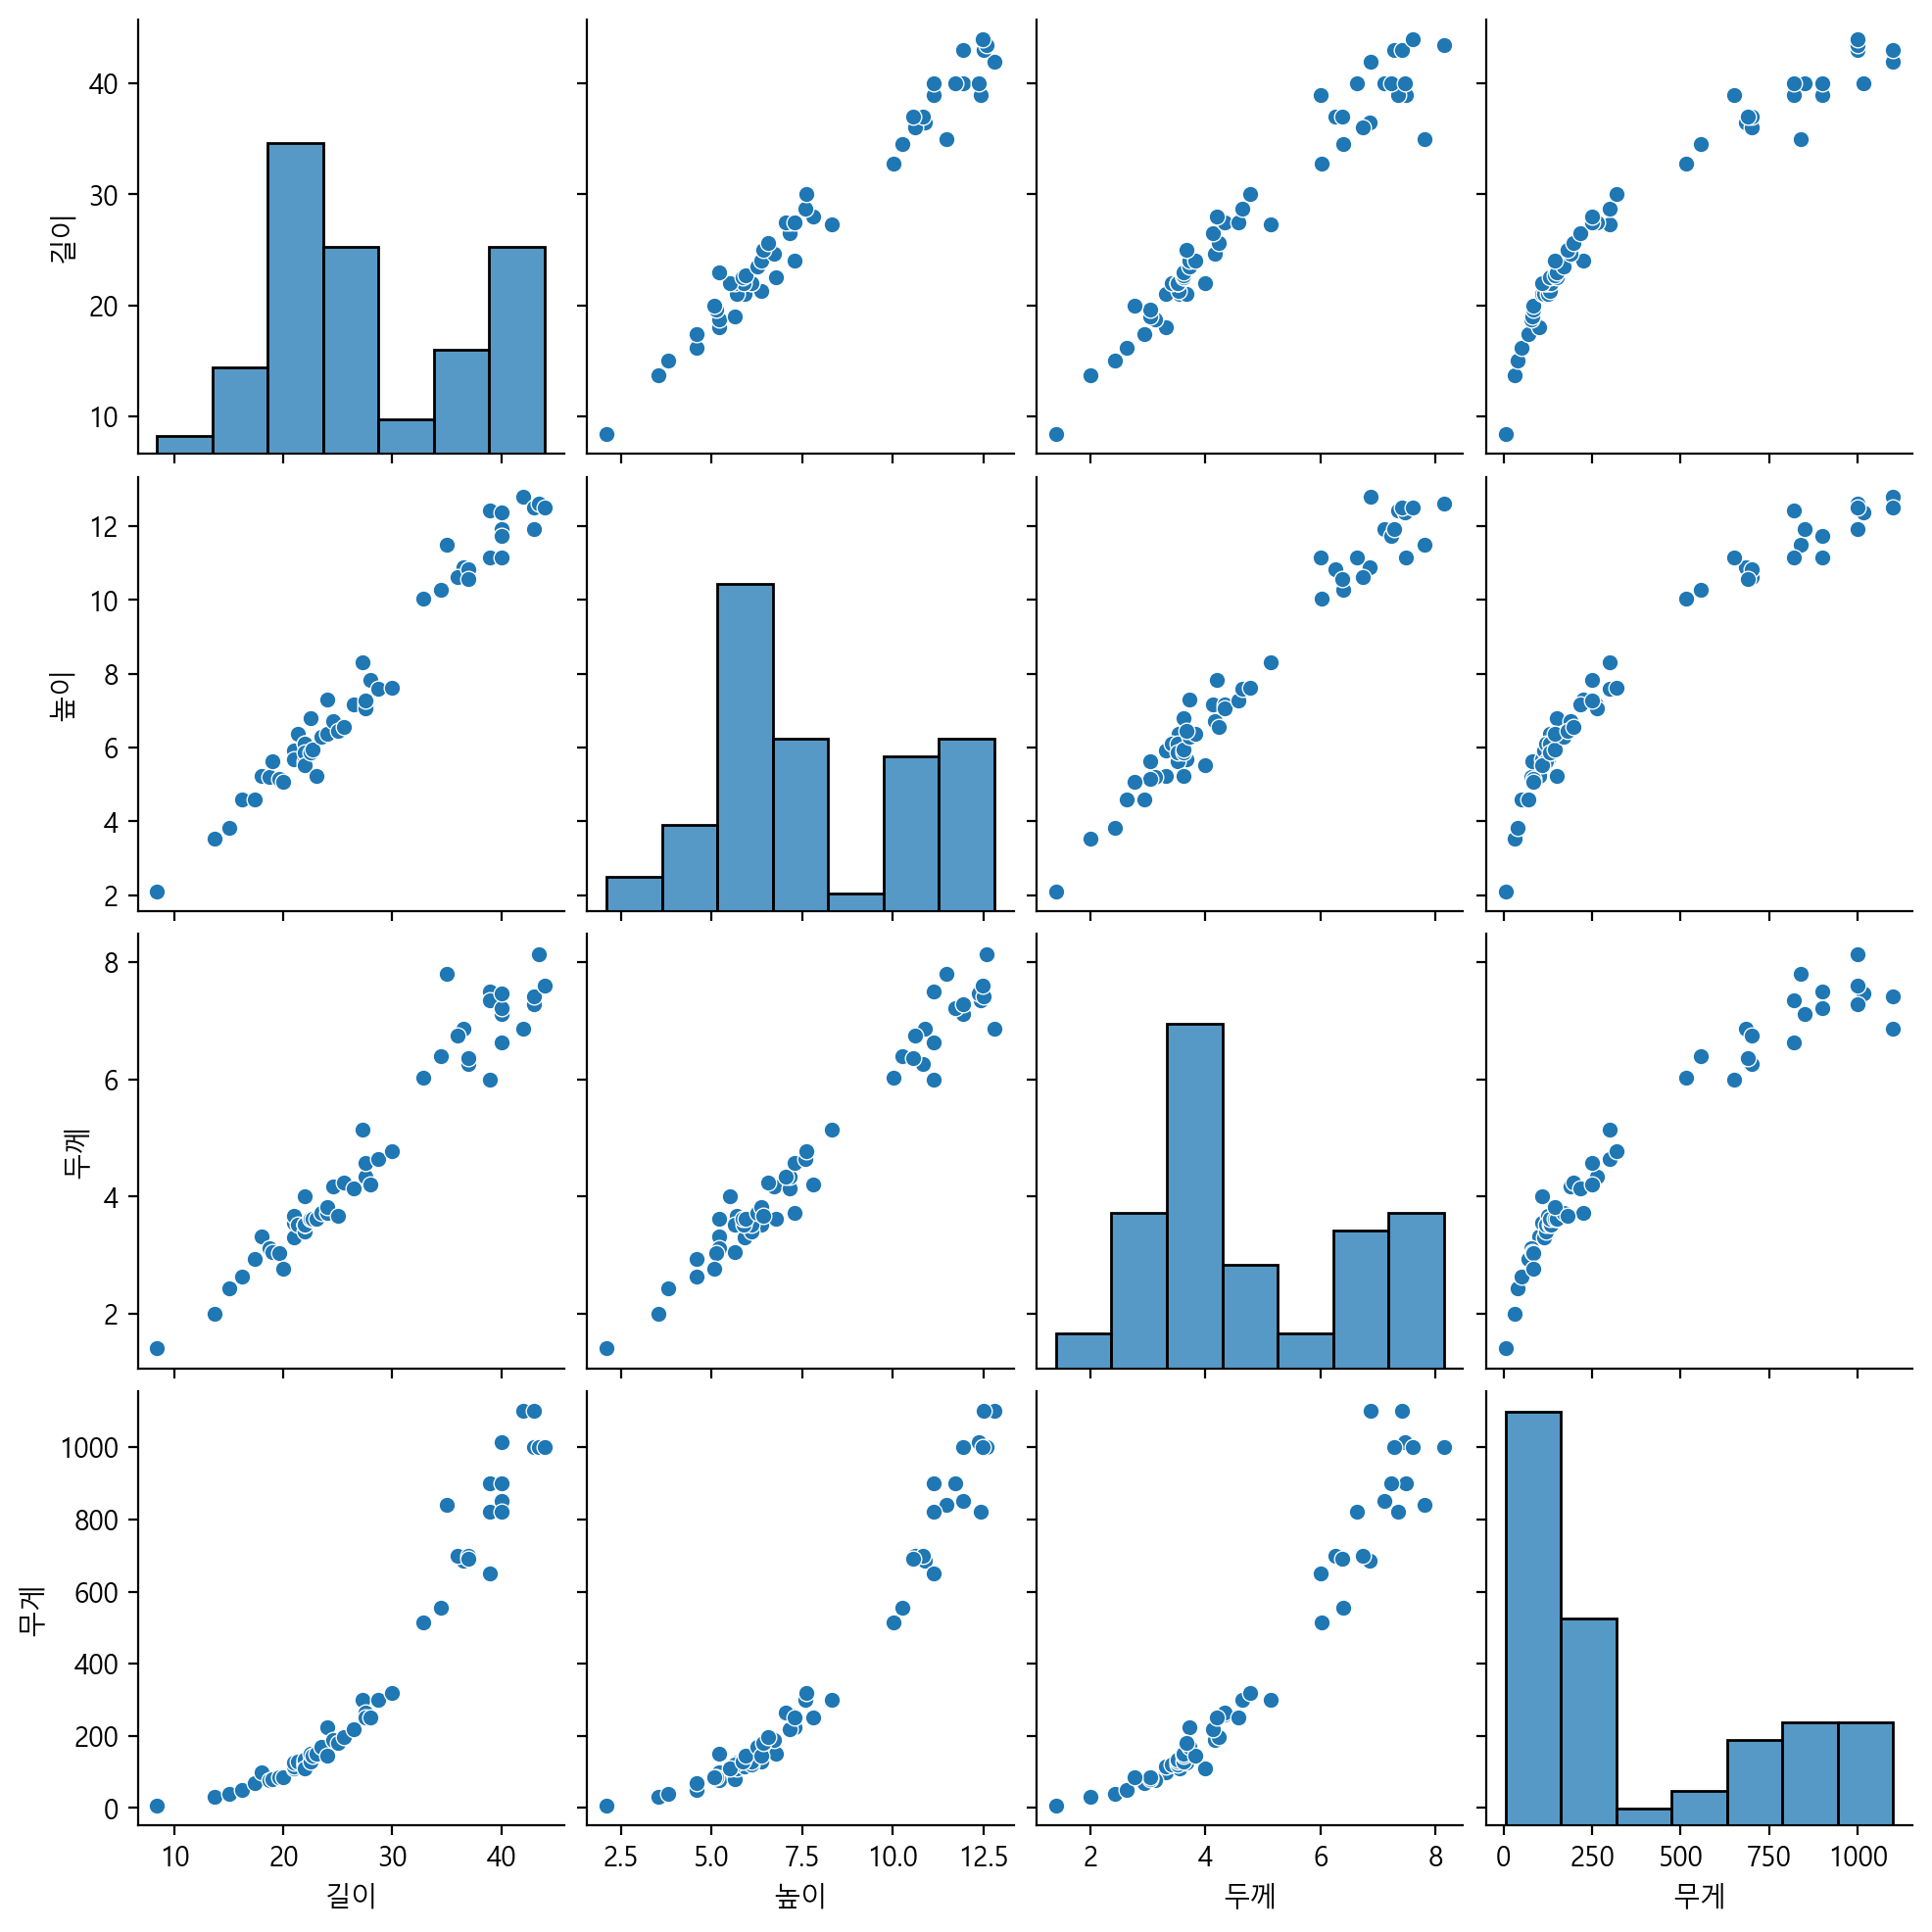

In [30]:
my_pairplot(origin)

## #03. 데이터 전처리

### [1] 2차항 만들기

`PolynomialFeatures`클래스를 사용하여 $y=ax+b$ 라는 회귀식을 $y=ax^2+bx+c$ 형태로 바꾼다.

#### (1) 2차항에 대한 변수값 생성

| 파라미터 | 설명 |
|---|---|
| degree | 변환할 차수 (기본값=2) |
| include_bias | True인 경우 0차항(1)도 함께 생성한다. (기본값=True, False권장) |

In [31]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_fit = poly.fit_transform(origin[["길이", "높이", "두께"]])
poly_fit

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.370000e+01, 3.530000e+00, 2.000000e+00, 1.876900e+02,
        4.836100e+01, 2.740000e+01, 1.246090e+01, 7.060000e+00,
        4.000000e+00],
       [1.500000e+01, 3.820000e+00, 2.430000e+00, 2.250000e+02,
        5.730000e+01, 3.645000e+01, 1.459240e+01, 9.282600e+00,
        5.904900e+00],
       [1.620000e+01, 4.590000e+00, 2.630000e+00, 2.624400e+02,
        7.435800e+01, 4.260600e+01, 2.106810e+01, 1.207170e+01,
        6.916900e+00],
       [1.740000e+01, 4.590000e+00, 2.940000e+00, 3.027600e+02,
        7.986600e+01, 5.115600e+01, 2.106810e+01, 1.349460e+01,
        8.643600e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [1.870000e+01, 5.200000e+00, 3.120000e+00, 3.496900e+02,
        9.724000e+01, 5.834400

#### (2) 각 변수별로 Feature의 이름 확인

In [32]:
poly.get_feature_names_out()

array(['길이', '높이', '두께', '길이^2', '길이 높이', '길이 두께', '높이^2', '높이 두께',
       '두께^2'], dtype=object)

#### (3) 데이터프레임으로 재구성

In [33]:
df = DataFrame(poly_fit, columns=poly.get_feature_names_out())
df['무게'] = origin['무게']
my_pretty_table(df.head())

+----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------+
|    |   길이 |   높이 |   두께 |   길이^2 |   길이 높이 |   길이 두께 |   높이^2 |   높이 두께 |   두께^2 |   무게 |
|----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    70.56 |      17.724 |      11.844 |   4.4521 |      2.9751 |   1.9881 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |   187.69 |      48.361 |        27.4 |  12.4609 |        7.06 |        4 |     32 |
|  2 |     15 |   3.82 |   2.43 |      225 |        57.3 |       36.45 |  14.5924 |      9.2826 |   5.9049 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   262.44 |      74.358 |      42.606 |  21.0681 |     12.0717 |   6.9169 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |   302.76 |      79.866 |      51.156 |  21.0681 |     13.4946 |   8.6436 |     70 |
+----+--------+--------+--------+----------+-------------+-------------+----------

### [2] 데이터 스케일링

In [34]:
std_df = my_standard_scaler(df, yname='무게')
my_pretty_table(std_df.head())

+----+----------+----------+----------+----------+-------------+-------------+----------+-------------+-----------+--------+
|    |     길이 |     높이 |     두께 |   길이^2 |   길이 높이 |   길이 두께 |   높이^2 |   높이 두께 |    두께^2 |   무게 |
|----+----------+----------+----------+----------+-------------+-------------+----------+-------------+-----------+--------|
|  0 | -2.18023 | -2.01651 | -1.89617 | -1.49794 |    -1.42819 |    -1.40394 | -1.35806 |    -1.33591 |  -1.30066 |    5.9 |
|  1 | -1.58743 |  -1.5187 | -1.56077 | -1.27511 |    -1.23519 |    -1.24318 | -1.19201 |    -1.19693 |  -1.18991 |     32 |
|  2 | -1.44203 | -1.41704 | -1.31633 | -1.20413 |    -1.17887 |    -1.14965 | -1.14781 |    -1.12132 |  -1.08504 |     40 |
|  3 | -1.30782 |  -1.1471 | -1.20263 | -1.13291 |    -1.07141 |    -1.08603 | -1.01354 |    -1.02643 |  -1.02933 |   51.5 |
|  4 |  -1.1736 |  -1.1471 | -1.02641 |  -1.0562 |    -1.03672 |    -0.99767 | -1.01354 |    -0.97802 | -0.934271 |     70 |
+----+----------+---------

### [3] 훈련, 검증 데이터 분할

In [35]:
x_train, x_test, y_train, y_test = my_train_test_split(std_df, '무게', test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 9), (17, 9), (39,), (17,))

## #04 선형회귀 분석

In [36]:
fit = my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=False)

[회귀식]
무게 = 334.513 * 길이 + -350.522 * 높이 + -170.949 * 두께 + -3169.063 * 길이^2 + 1006.831 * 길이 높이 + 5386.829 * 길이 두께 + 2401.388 * 높이^2 + -5024.363 * 높이 두께 + -109.019 * 두께^2 + 372.044

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |        0.90044 |             48.7813 |               10885 |          104.331 |                         22.0631 |               -3.6547 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+


## #05. 분석 결과 시각화

### [1] 검증데이터 관측치에 대한 추세선 좌표 얻기

In [44]:
# 차수
degree = 2

# 그래프 x축의 변수
x = x_test['길이']

# 그래프 y축의 변수
y = y_test

# y에 대한 x의 2차 방정식 생성
coeff = np.polyfit(x, y, 2)

# x의 최소값과 최대값
minx = x.min()
maxx = x.max()

# x의 범위 아래에서 100개의 값 생성 --> x축 좌표
v_trend1 = np.linspace(minx, maxx, 100)

# 계수를 사용하여 y의 값을 계산
t_trend1 = coeff[-1]

for i in range(0, degree):
    t_trend1 += coeff[i] * v_trend1 ** (degree - i)
    
v_trend1, t_trend1

(array([-2.18022506, -2.14113497, -2.10204487, -2.06295478, -2.02386468,
        -1.98477459, -1.94568449, -1.90659439, -1.8675043 , -1.8284142 ,
        -1.78932411, -1.75023401, -1.71114392, -1.67205382, -1.63296373,
        -1.59387363, -1.55478353, -1.51569344, -1.47660334, -1.43751325,
        -1.39842315, -1.35933306, -1.32024296, -1.28115287, -1.24206277,
        -1.20297267, -1.16388258, -1.12479248, -1.08570239, -1.04661229,
        -1.0075222 , -0.9684321 , -0.92934201, -0.89025191, -0.85116181,
        -0.81207172, -0.77298162, -0.73389153, -0.69480143, -0.65571134,
        -0.61662124, -0.57753115, -0.53844105, -0.49935095, -0.46026086,
        -0.42117076, -0.38208067, -0.34299057, -0.30390048, -0.26481038,
        -0.22572029, -0.18663019, -0.14754009, -0.10845   , -0.0693599 ,
        -0.03026981,  0.00882029,  0.04791038,  0.08700048,  0.12609057,
         0.16518067,  0.20427077,  0.24336086,  0.28245096,  0.32154105,
         0.36063115,  0.39972124,  0.43881134,  0.4

### [2] 검증데이터 예측치에 대한 추세선 좌표 얻기

In [45]:
y_pred = fit.predict(x_test)
coeff = np.polyfit(x, y_pred, 2)

minx = x.min()
maxx = x.max()

v_trend2 = np.linspace(minx, maxx, 100)
t_trend2 = coeff[-1]

for i in range(0, degree):
    t_trend2 += coeff[i] * v_trend2 ** (degree - i)
    
v_trend2, t_trend2

(array([-2.18022506, -2.14113497, -2.10204487, -2.06295478, -2.02386468,
        -1.98477459, -1.94568449, -1.90659439, -1.8675043 , -1.8284142 ,
        -1.78932411, -1.75023401, -1.71114392, -1.67205382, -1.63296373,
        -1.59387363, -1.55478353, -1.51569344, -1.47660334, -1.43751325,
        -1.39842315, -1.35933306, -1.32024296, -1.28115287, -1.24206277,
        -1.20297267, -1.16388258, -1.12479248, -1.08570239, -1.04661229,
        -1.0075222 , -0.9684321 , -0.92934201, -0.89025191, -0.85116181,
        -0.81207172, -0.77298162, -0.73389153, -0.69480143, -0.65571134,
        -0.61662124, -0.57753115, -0.53844105, -0.49935095, -0.46026086,
        -0.42117076, -0.38208067, -0.34299057, -0.30390048, -0.26481038,
        -0.22572029, -0.18663019, -0.14754009, -0.10845   , -0.0693599 ,
        -0.03026981,  0.00882029,  0.04791038,  0.08700048,  0.12609057,
         0.16518067,  0.20427077,  0.24336086,  0.28245096,  0.32154105,
         0.36063115,  0.39972124,  0.43881134,  0.4

### [3] 추세선을 직접 구현한 산점도 그래프

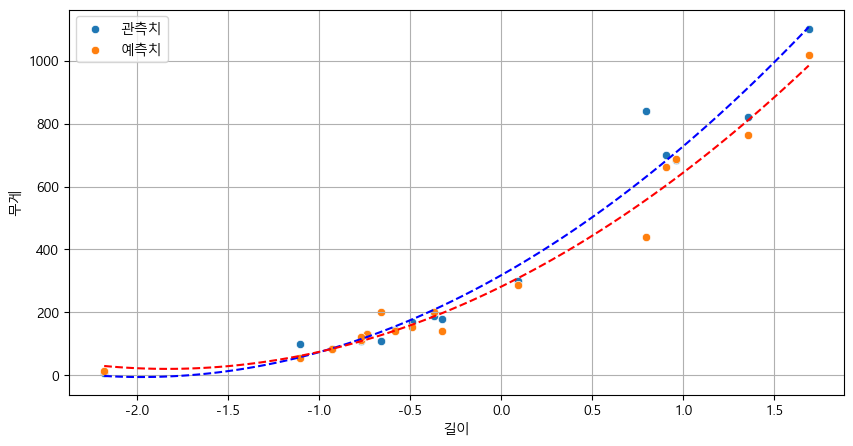

In [47]:
plt.figure(figsize=(10, 5), dpi=100)

sb.scatterplot(x=x, y=y, label='관측치')
sb.scatterplot(x=x, y=y_pred, label='예측치')

sb.lineplot(x=v_trend1, y=t_trend1, linestyle='--', color='blue')
sb.lineplot(x=v_trend2, y=t_trend2, linestyle='--', color='red')

plt.grid()
plt.show()
plt.close()

## #06. 모듈에 수정된 시각화 기능까지 확인

[회귀식]
무게 = 334.513 * 길이 + -350.522 * 높이 + -170.949 * 두께 + -3169.063 * 길이^2 + 1006.831 * 길이 높이 + 5386.829 * 길이 두께 + 2401.388 * 높이^2 + -5024.363 * 높이 두께 + -109.019 * 두께^2 + 372.044

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |        0.90044 |             48.7813 |               10885 |          104.331 |                         22.0631 |               -3.6547 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+


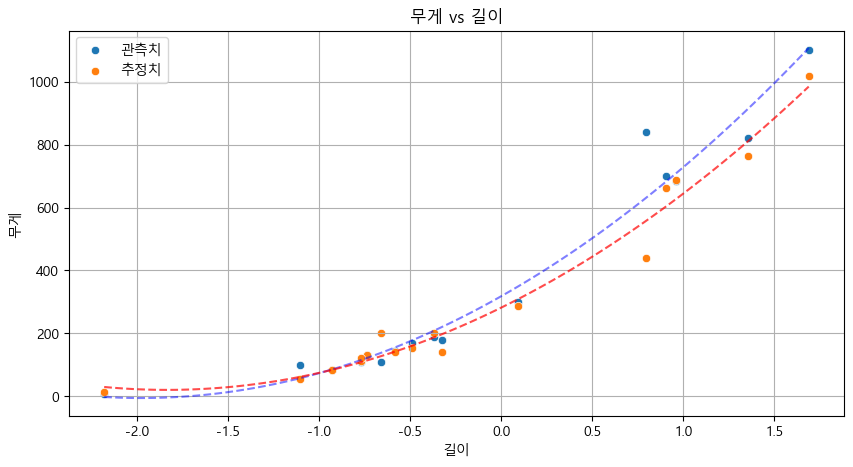

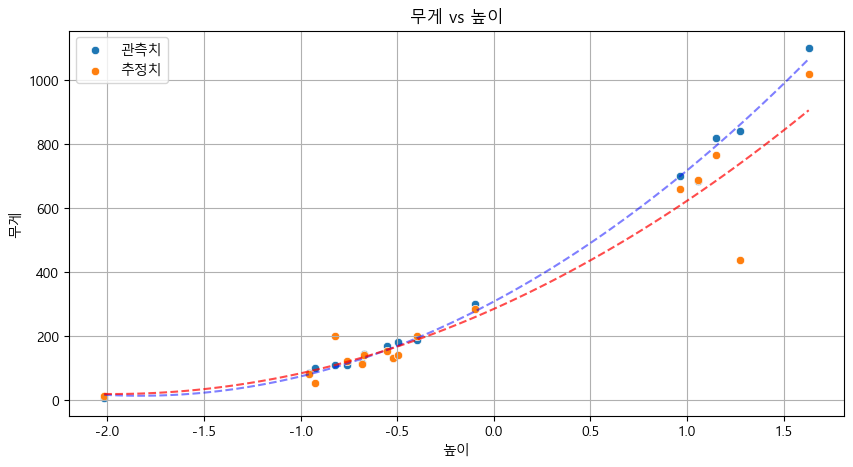

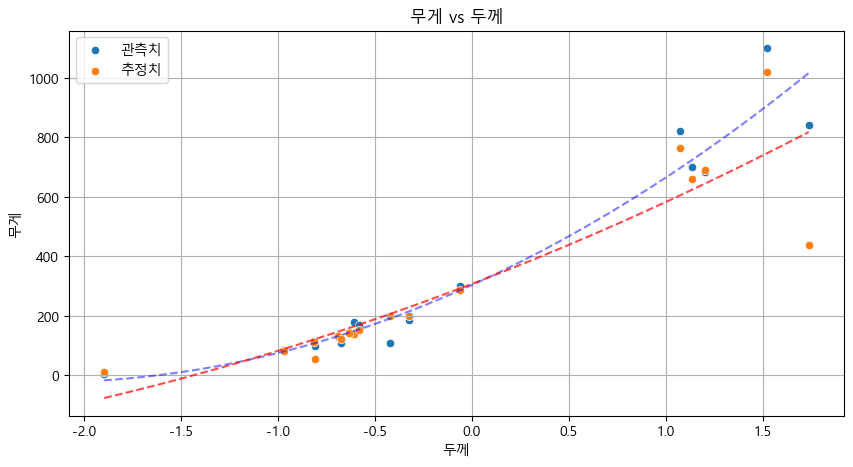

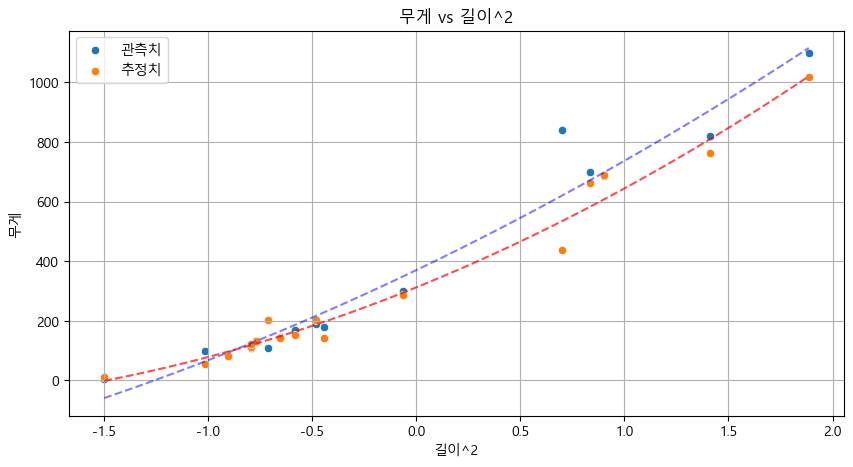

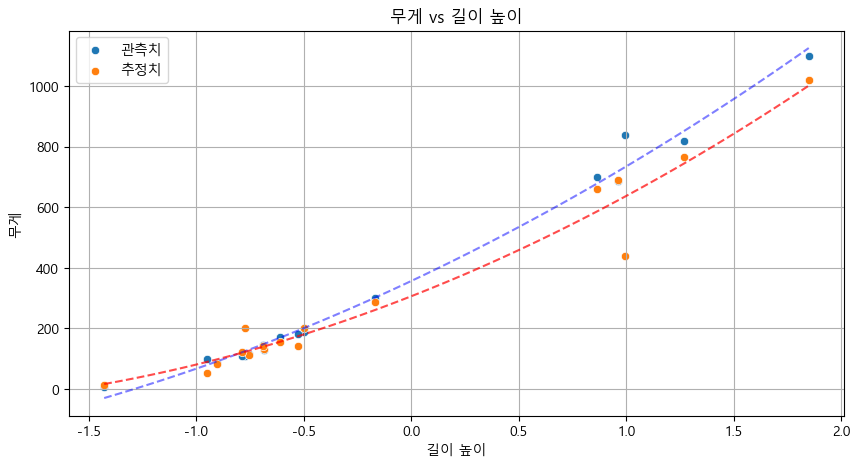

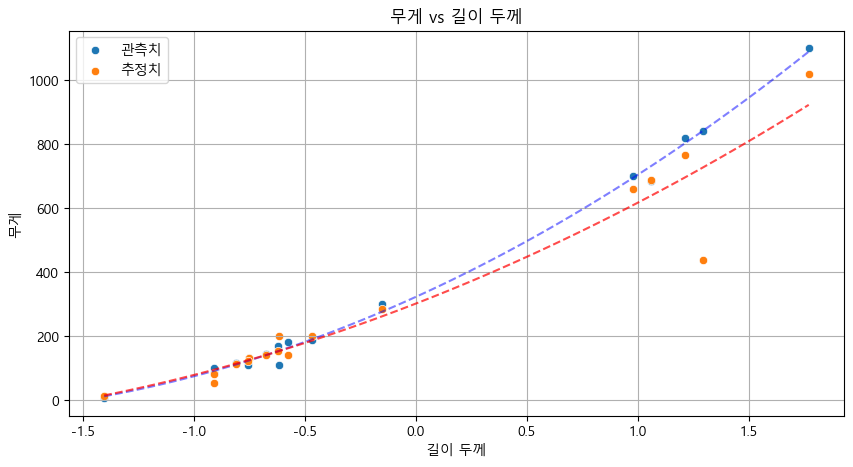

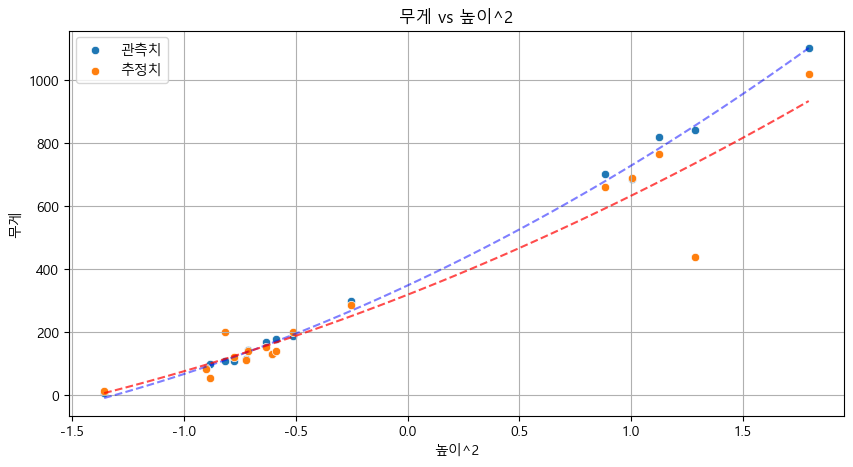

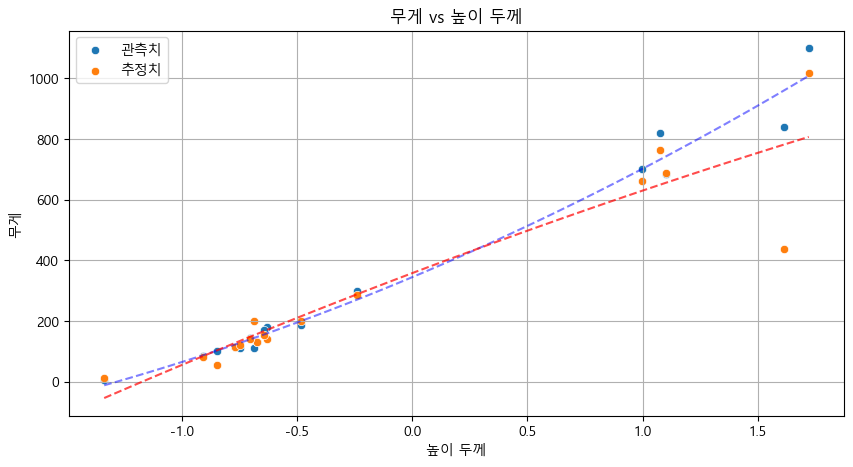

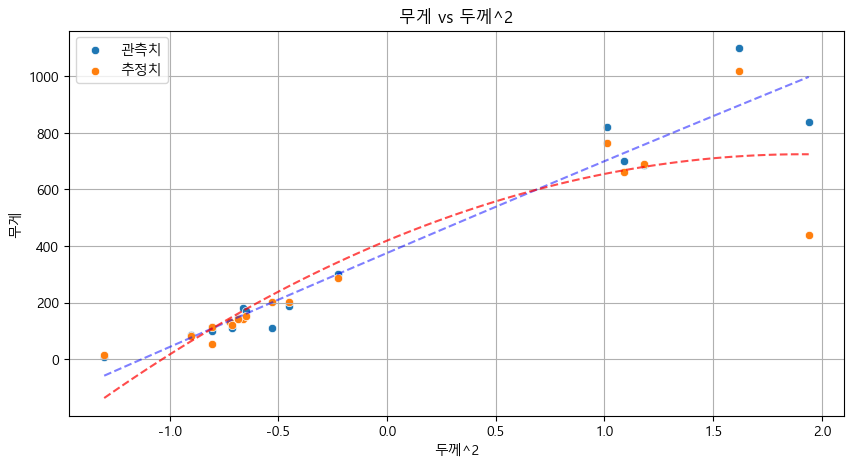

In [49]:
fit = my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=True, report=False, dpi=100)